### Bike Sharing Assignment

### Problem statement:
Build a multiple linear regression model for the prediction of demand for shared bikes with various available independent variables from the dataset of `BoomBikes`, a US bike-sharing provider.

Steps
- Reading , understanding and Visualizing the data
- Preparing the data for Modelling
 - Train - Test split
 - Rescaling
- Training the Model
- Residual Analysis
- Predictions and Evaluations on the test set

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Understanding Data

In [2]:
# Import the data into a dataframe
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Meanings of the variables
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
#lets see the shape of the dataframe
data.shape

(730, 16)

In [4]:
#details of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The dataset is clean with no missing values and doesnt require datatype conversions

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We have to rename some of the variables for better understanding, add dummy variables for categorical variables, changing the strings of categorical varibles into numericals.

In [6]:
#renaming few columns
data.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)
data.head(2)

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [7]:
#dropping columns that doesnt contribute for our analysis 
data=data.drop(['instant','dteday','casual', 'registered'],axis=1)

In [8]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing the continuous varibles and categorical variables with target variable


<Figure size 1080x864 with 0 Axes>

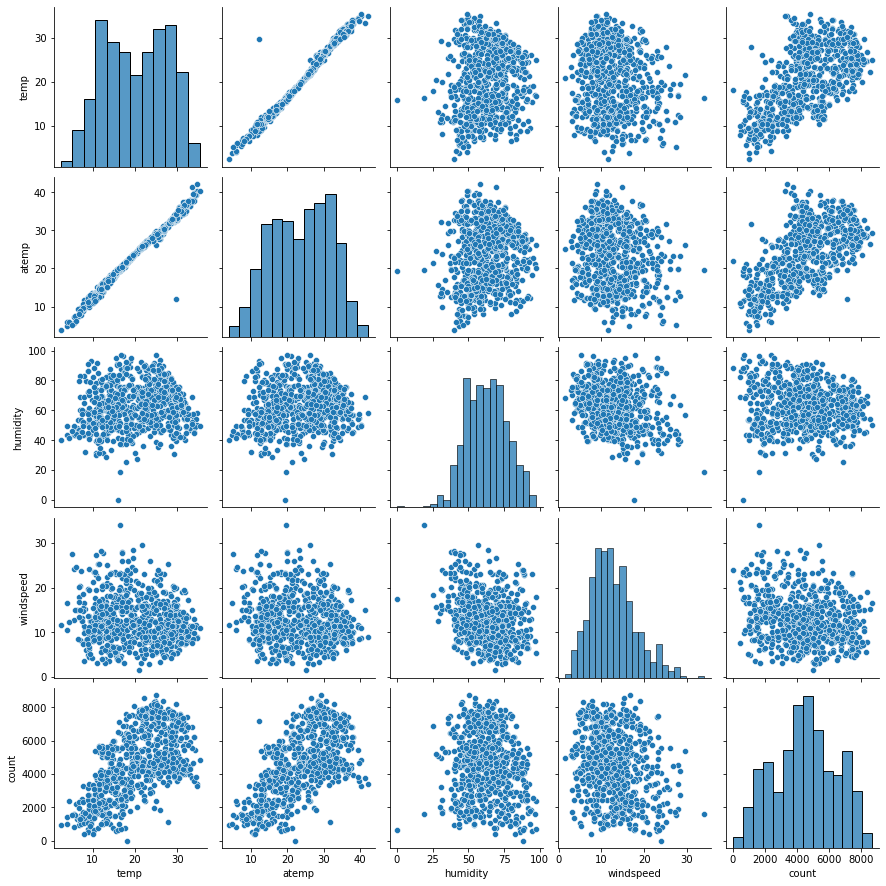

In [9]:
#Lets visualize continuous varibles with pairplot
plt.figure(figsize=(15,12))
sns.pairplot(data[['temp','atemp','humidity','windspeed','count']])
plt.show()

We can see that some of the variance in count is explained by temp and atemp varible.

Also temp and atemp have almost perfect linear relationship and we know the reason for that.

All the continuous varibles are normally distributed

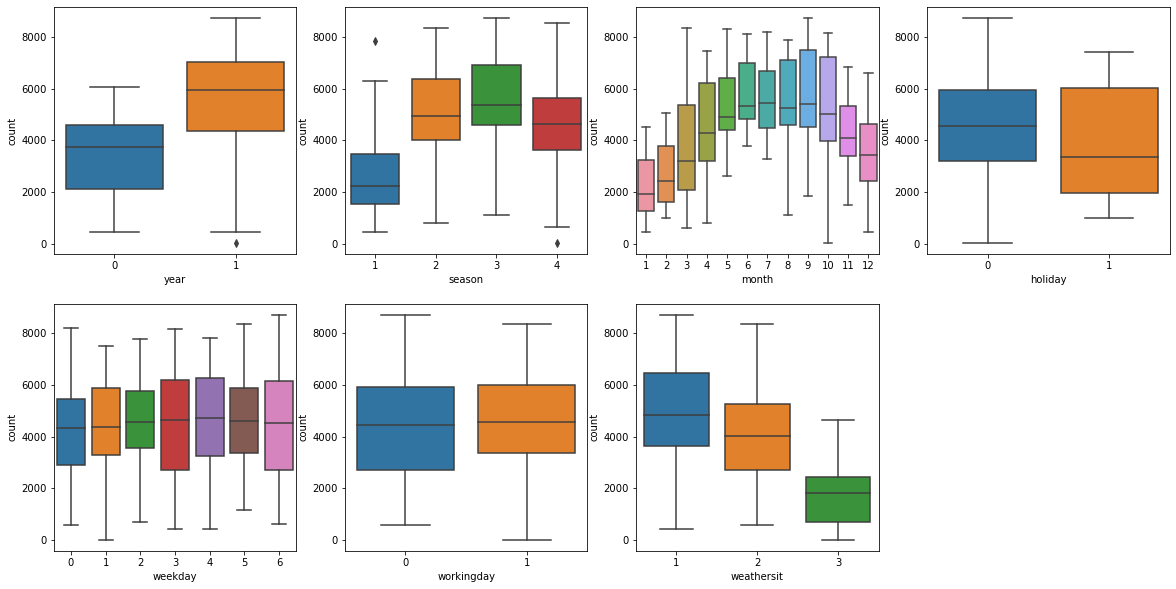

In [10]:
# Lets visualize categorical values with target varible
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'count', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = data)
plt.show()

##### From above Boxplots:
`Year and count`: We see that second has overall increase in the count 

`Season and count`: Spring has low count whereas summer and fall has high count of users which is reasonable and also Winter has slightly less count.

`Month and count`: It follows similar distribution of season and count because the previous one is binned boxplot of the latter.

`Weekday and count`: Weekday median is almost similar however the range differs. The median is highest on day 3.

`Workingday and count` and `Holiday and count` are inverse to each other.

`Weathersit and Count`:  count is highest in Clear, Few clouds, Partly cloudy, Partly cloudy days and followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist days and at last Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds days.


### Step 2: Preparing the data for Modelling

In [11]:
#lets convert the categorical columns data type
categorical_cols = ['month', 'season', 'weekday', 'weathersit']
for col in categorical_cols:
    data[col] = pd.Categorical(data[col])
print(data.dtypes)

season        category
year             int64
month         category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
count            int64
dtype: object


In [12]:
# Lets create dummy variables for the levels in these categorical variables 
dummy_categorical_cols = pd.get_dummies(data[categorical_cols], drop_first = True)
dummy_categorical_cols.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#lets replace these dummified varibles into the original data set and delete original cols

#drop previous columns
data.drop(categorical_cols, axis = 1, inplace = True)

#concat new dummified columns into data set
data=pd.concat([data, dummy_categorical_cols],axis=1)

data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_2,month_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


#### lets do the train test data split


In [14]:
#We have already imported train test split from scikitlearn

train_data, test_data= train_test_split(data,train_size = 0.7, test_size = 0.3,random_state=100)

In [15]:
print(train_data.shape)
print(test_data.shape)

(510, 30)
(219, 30)


#### lets normalize the train data with minmax scaler

In [16]:
#import MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

#create an instance to MinMaxScaler
scaler=MinMaxScaler()

In [17]:
#Now we should apply scaling scaler to all the variables except the dummified variables
numerical_variables=['temp', 'atemp', 'humidity', 'windspeed','count']

#fittranform the t
train_data[numerical_variables]=scaler.fit_transform(train_data[numerical_variables])

In [18]:
data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_2,month_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Lets see the correlations with the heatmap


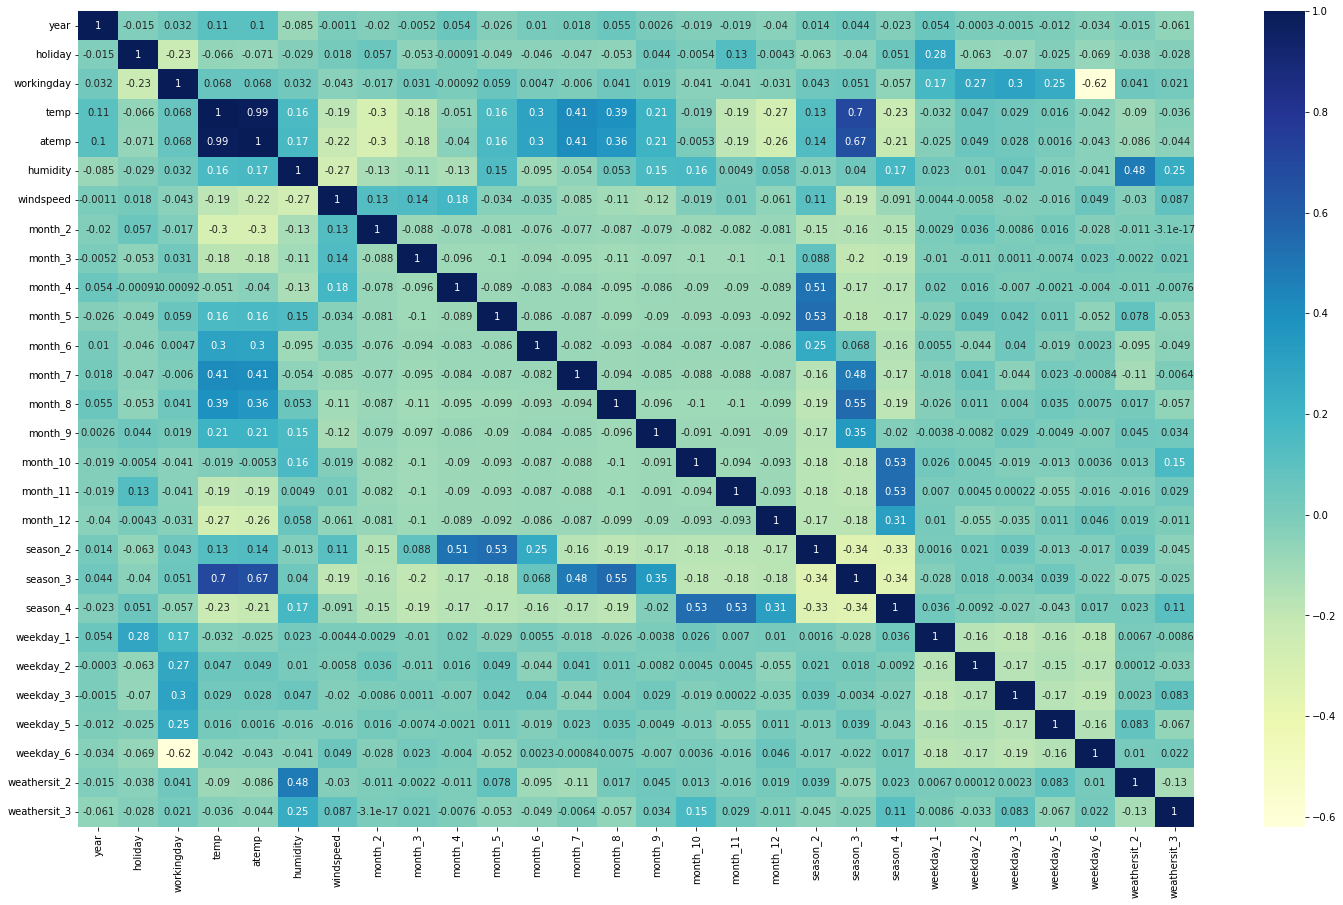

In [60]:
plt.figure(figsize=(25,15))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")
plt.show()

From the heatmap we can find that
 - Count has good positive correlation with temp and atemp
 - Count has decent positive correlation with year and season 3

### Step 3: Training the Model

In [20]:
#Lets split the train data into y_train and x_train
y_train=train_data.pop('count')
X_train=train_data

#### lets build our first model with the two highly correlated varibles atemp, year as seen from the heatmap

In [21]:
# lets build our first model with the two highly correlated varibles atemp, year

X_train_sm=sm.add_constant(X_train[['atemp','year']])
lr =sm.OLS(y_train, X_train_sm).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.07e-131
Time:                        17:28:39   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.000       0.043       0.102
atemp          0.6252      0.026     24.001      0.000       0.574       0.676
year           0.2378      0.011     21.511      0.000       0.216       0.260
==============================================================================
Omnibus:                       38.030   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.520
Skew:                          -0.536   Prob(JB):                     1.96e-13
Kurtosis:                       4.266   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

These two variables are significant, as per the  P statistic and also R-squared is about 0.696, which is pretty good.

F-Statistic is almost Zero which means the overall fit is significant.

Lets create a model with all the variables to see the R-Squared.

In [22]:
# model with all the variables

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

In [23]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          8.42e-181
Time:                        17:28:39   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777      0.000       0.116       0.235
year             0.2322      0.008     28.792      0.000       0.216       0.248
holiday         -0.0424      0.024     -1.793      0.074      -0.089       0.004
workingday       0.0439      0.009      4.689      0.000       0.025       0.062
temp             0.4013      0.142      2.821      0.005       0.122       0.681
atemp            0.0506      0.138      0.366      0.714      -0.221       0.322
humidity        -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed       -0.1844      0.026     -7.003      0.000      -0.236      -0.133
month_2          0.0304      0.021      1.474      0.141      -0.010       0.071
month_3          0.0639      0.022      2.857      0.004       0.020       0.108
month_4          0.0626      0.034      1.864      0.063      -0.003       0.129
month_5          0.0873      0.036      2.412      0.016       0.016       0.158
month_6          0.0609      0.039      1.556      0.120      -0.016       0.138
month_7          0.0233      0.044      0.529      0.597      -0.063       0.110
month_8          0.0786      0.042      1.873      0.062      -0.004       0.161
month_9          0.1444      0.037      3.853      0.000       0.071       0.218
month_10         0.0703      0.034      2.041      0.042       0.003       0.138
month_11         0.0208      0.033      0.633      0.527      -0.044       0.085
month_12         0.0170      0.027      0.641      0.522      -0.035       0.069
season_2         0.0868      0.024      3.679      0.000       0.040       0.133
season_3         0.0486      0.030      1.618      0.106      -0.010       0.108
season_4         0.1540      0.026      5.932      0.000       0.103       0.205
weekday_1       -0.0099      0.010     -1.023      0.307      -0.029       0.009
weekday_2       -0.0078      0.011     -0.695      0.488      -0.030       0.014
weekday_3        0.0058      0.011      0.554      0.580      -0.015       0.026
weekday_4        0.0018      0.011      0.165      0.869      -0.020       0.023
weekday_5        0.0116      0.011      1.031      0.303      -0.010       0.034
weekday_6        0.0545      0.015      3.757      0.000       0.026       0.083
weathersit_2    -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_3    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                     1.71e+15
===============

We got our `R-squared:	0.853` & `Adj. R-squared:	0.845` Which is very good model

But there are insignificant variables in our model, which we have to remove.
It will be even a better model if we remove few variables that aren't worth and still be able to get decent ADJ.R-Square

`Removing Variables only because of High P>|t| is not advisable, Lets check the VIF of the variables and come to conclusion.

In [24]:
# Lets import VIF from stats model

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Since we need to calculate VIF after we drop a varible lets create a a method to calcuate it and call it when needed.

def calc_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [26]:
# Now lets get VIF of our current model
calc_vif(X_train_lm)

,Features,VIF
2,holiday,inf
3,workingday,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
4,temp,67.12
0,const,60.22
5,atemp,56.09


In [27]:
#Lets remove weekday4 and fit the model because it is least significant as it has very high P-value 

X1= X_train.pop('weekday_4')

X_train_lm1=sm.add_constant(X_train)
lr =sm.OLS(y_train, X_train_lm1).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          8.42e-181
Time:                        17:28:39   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1756      0.030      5.777      0.000       0.116       0.235
year             0.2322      0.008     28.792      0.000       0.216       0.248
holiday         -0.0406      0.030     -1.351      0.177      -0.100       0.018
workingday       0.0457      0.015      3.016      0.003       0.016       0.075
temp             0.4013      0.142      2.821      0.005       0.122       0.681
atemp            0.0506      0.138      0.366      0.714      -0.221       0.322
humidity        -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed       -0.1844      0.026     -7.003      0.000      -0.236      -0.133
month_2          0.0304      0.021      1.474      0.141      -0.010       0.071
month_3          0.0639      0.022      2.857      0.004       0.020       0.108
month_4          0.0626      0.034      1.864      0.063      -0.003       0.129
month_5          0.0873      0.036      2.412      0.016       0.016       0.158
month_6          0.0609      0.039      1.556      0.120      -0.016       0.138
month_7          0.0233      0.044      0.529      0.597      -0.063       0.110
month_8          0.0786      0.042      1.873      0.062      -0.004       0.161
month_9          0.1444      0.037      3.853      0.000       0.071       0.218
month_10         0.0703      0.034      2.041      0.042       0.003       0.138
month_11         0.0208      0.033      0.633      0.527      -0.044       0.085
month_12         0.0170      0.027      0.641      0.522      -0.035       0.069
season_2         0.0868      0.024      3.679      0.000       0.040       0.133
season_3         0.0486      0.030      1.618      0.106      -0.010       0.108
season_4         0.1540      0.026      5.932      0.000       0.103       0.205
weekday_1       -0.0118      0.015     -0.777      0.437      -0.041       0.018
weekday_2       -0.0096      0.015     -0.620      0.535      -0.040       0.021
weekday_3        0.0040      0.015      0.274      0.784      -0.025       0.033
weekday_5        0.0097      0.016      0.625      0.532      -0.021       0.040
weekday_6        0.0545      0.015      3.757      0.000       0.026       0.083
weathersit_2    -0.0610      0.010     -5.845      0.000      -0.082      -0.041
weathersit_3    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
==============================================================================
Omnibus:                       85.143   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.880
Skew:                          -0.809   Prob(JB):                     2.21e-52
Kurtosis:                       5.929   Cond. No.                         92.5
==============================================================================

Notes:
[1] Stand

#### Here we see that even after dropping weekend_4 the r-squared didnt change. We can drop the variables one by one and check which have high p-value and high VIF and then fit the model again. But we have too many variables, so lets use RFE and select the top variables that we require

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE to get top 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
#printing to top 15 variable rankwise

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_2', False, 7),
 ('month_3', False, 2),
 ('month_4', False, 4),
 ('month_5', False, 3),
 ('month_6', False, 5),
 ('month_7', False, 8),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 9),
 ('month_12', False, 10),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [31]:
#Lets take the columns of rfe top 15 and store into cols
cols=X_train.columns[rfe.support_]
print("The columns taken into model: ")
print(cols, "\n")
no_cols=X_train.columns[~rfe.support_]
print("Columns excluded from the model: ")
print(no_cols)

The columns taken into model: 
Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_8', 'month_9', 'month_10', 'season_2', 'season_3', 'season_4',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object') 

Columns excluded from the model: 
Index(['atemp', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_11', 'month_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_5'],
      dtype='object')


In [32]:
#create df for RFE train data set with these 15 columns
X_train_rfe=X_train[cols]

#lets add constant to our df
X_train_rfe = sm.add_constant(X_train_rfe)

#lets run the model and fit
lm = sm.OLS(y_train,X_train_rfe).fit() 

#lets see the stats
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.89e-191
Time:                        17:28:39   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791      0.000       0.139       0.251
year             0.2301      0.008     28.776      0.000       0.214       0.246
holiday         -0.0546      0.027     -2.033      0.043      -0.107      -0.002
workingday       0.0446      0.012      3.877      0.000       0.022       0.067
temp             0.4960      0.034     14.803      0.000       0.430       0.562
humidity        -0.1623      0.037     -4.353      0.000      -0.235      -0.089
windspeed       -0.1824      0.025     -7.200      0.000      -0.232      -0.133
month_8          0.0475      0.017      2.745      0.006       0.013       0.081
month_9          0.1178      0.017      6.895      0.000       0.084       0.151
month_10         0.0442      0.017      2.565      0.011       0.010       0.078
season_2         0.1175      0.015      7.985      0.000       0.089       0.146
season_3         0.0295      0.022      1.346      0.179      -0.014       0.073
season_4         0.1430      0.013     10.688      0.000       0.117       0.169
weekday_6        0.0533      0.015      3.676      0.000       0.025       0.082
weathersit_2    -0.0592      0.010     -5.702      0.000      -0.080      -0.039
weathersit_3    -0.2523      0.026     -9.655      0.000      -0.304      -0.201
==============================================================================
Omnibus:                       77.307   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.274
Skew:                          -0.748   Prob(JB):                     5.94e-46
Kurtosis:                       5.751   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Here we see the model with top 15 varibles and still has great R-Squared.  However season3 has p-value of greater than 0.05


Lets print the VIF values and come to conclusion

In [33]:
calc_vif(X_train_rfe)

,Features,VIF
0,const,53.48
11,season_3,6.04
4,temp,3.71
10,season_2,2.60
12,season_4,2.17
5,humidity,1.91
3,workingday,1.88
13,weekday_6,1.79
7,month_8,1.68
14,weathersit_2,1.58


#### So with high p-value (<0.05) and High VIF (<5) we can comfortably drop season_3

Lets create new model without season_3


In [34]:
#removing season_3 from X_test
X_train_rfe.pop('season_3')

#We have to remove const and add it back again as previous const accounts for season_3
X_train_rfe.pop('const')

X_train_rfe.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_8', 'month_9', 'month_10', 'season_2', 'season_4', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
#lets add constant to our df
X_train_rfe = sm.add_constant(X_train_rfe)

#lets run the model and fit
lm = sm.OLS(y_train,X_train_rfe).fit() 

#lets see the stats
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          3.24e-192
Time:                        17:28:40   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
year             0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
humidity        -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
month_8          0.0560      0.016      3.478      0.001       0.024       0.088
month_9          0.1255      0.016      7.783      0.000       0.094       0.157
month_10         0.0411      0.017      2.403      0.017       0.007       0.075
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All P-values are less than 0.03 except `holiday` , But lets check VIF values

In [36]:
calc_vif(X_train_rfe)

,Features,VIF
0,const,53.47
3,workingday,1.88
5,humidity,1.88
12,weekday_6,1.79
11,season_4,1.72
4,temp,1.59
13,weathersit_2,1.57
9,month_10,1.49
7,month_8,1.46
10,season_2,1.38


#### Lets drop Holiday and fit new model to maintain 97% confidence

In [37]:
#removing season_3 from X_test
X_train_rfe.pop('holiday')

#We have to remove const and add it back again as previoud const accounts for season_3
X_train_rfe.pop('const')

#lets add constant to our df
X_train_rfe = sm.add_constant(X_train_rfe)

#lets run the model and fit
lm = sm.OLS(y_train,X_train_rfe).fit() 

#lets see the stats
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 23 Mar 2022   Prob (F-statistic):          1.86e-192
Time:                        17:28:40   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -946.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1848      0.028      6.496      0.000       0.129       0.241
year             0.2293      0.008     28.670      0.000       0.214       0.245
workingday       0.0527      0.011      4.858      0.000       0.031       0.074
temp             0.5317      0.022     24.142      0.000       0.488       0.575
humidity        -0.1683      0.037     -4.540      0.000      -0.241      -0.095
windspeed       -0.1865      0.025     -7.368      0.000      -0.236      -0.137
month_8          0.0564      0.016      3.489      0.001       0.025       0.088
month_9          0.1237      0.016      7.660      0.000       0.092       0.155
month_10         0.0423      0.017      2.469      0.014       0.009       0.076
season_2         0.1046      0.011      9.720      0.000       0.083       0.126
season_4         0.1341      0.012     11.221      0.000       0.111       0.158
weekday_6        0.0613      0.014      4.388      0.000       0.034       0.089
weathersit_2    -0.0579      0.010     -5.572      0.000      -0.078      -0.038
weathersit_3    -0.2478      0.026     -9.498      0.000      -0.299      -0.197
==============================================================================
Omnibus:                       76.904   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.849
Skew:                          -0.749   Prob(JB):                     5.43e-45
Kurtosis:                       5.711   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Calculate VIF
calc_vif(X_train_rfe)

,Features,VIF
0,const,52.04
4,humidity,1.88
10,season_4,1.72
2,workingday,1.65
11,weekday_6,1.65
3,temp,1.59
12,weathersit_2,1.57
8,month_10,1.49
6,month_8,1.46
9,season_2,1.38


Conclusions:
- We dont have any insignificant variables as all of them have p-value <0.03
- 1.88 is the highest VIF model in our model, so it implies there is no multicollinearity.
- Prob (F-statistic):	1.86e-192 which is almost Zero, So the model is good fit.

We can say that this model is best model we created.

### Step 4: Residual Analysis


Lets check if the error terms are normally distributed which is one of the major assumptions of linear regression.

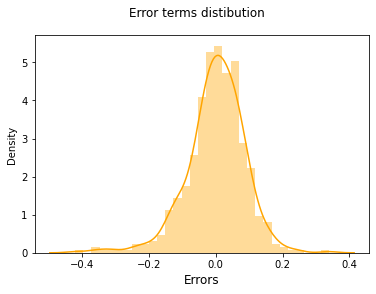

In [39]:
#predict the y values of the train data
y_train_pred= lm.predict(X_train_rfe)

#plot the distribution plot of the residuals
residuals=y_train- y_train_pred 
sns.distplot(residuals,color='orange')
plt.suptitle("Error terms distibution")
plt.xlabel("Errors", fontsize=12)
plt.show()

In [40]:
#Lets find the mean of these error terms 
lm.resid.mean()

-7.108692719438135e-16

#### From both the Distribution plot and mean calculation we can say that the error terms follow normal dirstibution with mean centered at zero.

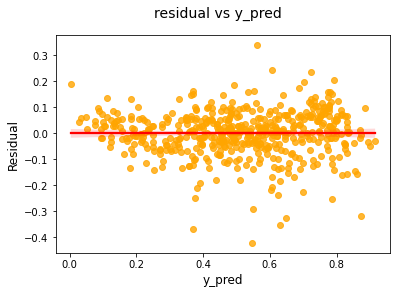

In [41]:
#Lets check if the property of Homoscedasticity holds with our model

sns.regplot(x=y_train_pred, y=lm.resid, color='orange',line_kws={'color': 'red'})
plt.suptitle('residual vs y_pred', fontsize=14)              
plt.xlabel('y_pred', fontsize=12)                         
plt.ylabel('Residual', fontsize=12)
plt.show()


The Homoscedasticity holds well as the variance of the residuals has mean of zero.

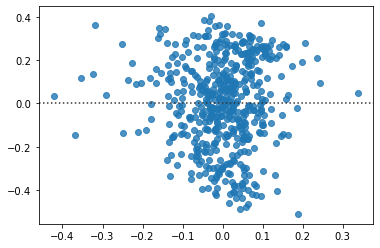

In [58]:
#Lets check if there are patterns in the residuals
sns.residplot(residuals,y_train_pred)
plt.show()

There is no pattern in the residuals

### Step 5: Predictions and Evaluations on the test set

In [42]:
#Lets tranform the test set to make the predictions
#we already have list of numerical columns to use

test_data[numerical_variables]=scaler.transform(test_data[numerical_variables])

#Note: we dont do scaler fit on the test set, we just do transform.

#Lets see the test data after tranformation
test_data.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,count,month_2,month_3,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.100457,0.054795,...,0.246575,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.301297,0.228100,...,0.432005,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Lets separate x_test and y_test from test_data
y_test=test_data.pop('count')
X_test=test_data

In [45]:
# We have to drop the insignificant variables that we dropped in our final model
X_test_sm=X_test[['year', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_8', 'month_9', 'month_10', 'season_2', 'season_4', 'weekday_6',
       'weathersit_2', 'weathersit_3']]

In [46]:
#Lets add constant to the X_test
X_test_sm= sm.add_constant(X_test_sm)
X_test_sm.head()

,const,year,workingday,temp,humidity,windspeed,month_8,month_9,month_10,season_2,season_4,weekday_6,weathersit_2,weathersit_3
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,0,1,0
535,1.0,1,1,0.901354,0.610133,0.153728,0,0,0,1,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,1,0,1,0,1,0
221,1.0,0,1,0.881625,0.437098,0.339570,1,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,0,0,1,0,0,0,0


Lets predict the values for the test data set:


In [47]:
#prediction
y_pred=lm.predict(X_test_sm)

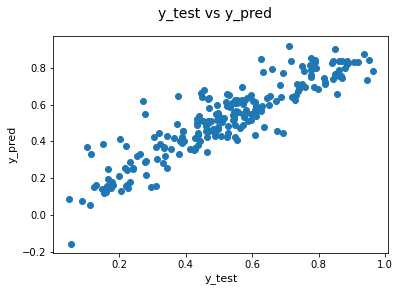

In [48]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=14)              # Plot heading 
plt.xlabel('y_test', fontsize=11)                          # X-label
plt.ylabel('y_pred', fontsize=11)
plt.show()

In [53]:
#Lets see the MSE and adjusted r-squared for the model we built:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

#lets calculate r^2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print(" Mean Squared Error: ",mse,"\n","R-Squared Value: ", r2_score(y_test, y_pred))

 Mean Squared Error:  0.008849380736168684 
 R-Squared Value:  0.8136808050898301


Our model is getting a mean square error of 0.008  which means the model is not able to match just less than 0.1% of the 
values only, which is incredible.

The r square value is about 81.3% which means our model is able to explain about 81% of the variance which is also 
Excellent.

Also the R^2 values of train and test set are very close. So, we can rule out the possibility of bias.

#### Lets Plot the actual y_test values with predicted y_test values

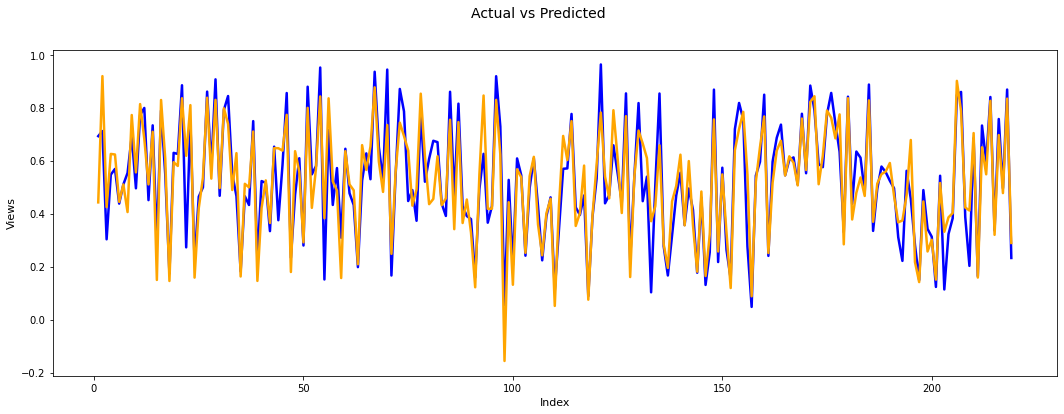

In [50]:
#Actual vs Predicted
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(18,6))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="orange",  linewidth=2.5, linestyle='-')
fig.suptitle('Actual vs Predicted', fontsize=14)             
plt.xlabel('Index', fontsize=11)                             
plt.ylabel('Views', fontsize=11) 
plt.show()

#### We can see that our model was able to predict inline with the true data. So our model is good and stable

In [51]:
#lets see the parameter of our model:
lm.params

const           0.184780
year            0.229323
workingday      0.052663
temp            0.531651
humidity       -0.168252
windspeed      -0.186547
month_8         0.056352
month_9         0.123706
month_10        0.042337
season_2        0.104649
season_4        0.134082
weekday_6       0.061344
weathersit_2   -0.057941
weathersit_3   -0.247816
dtype: float64

### Equation of the best fitted line for our Multi-regression model:

**The parameters are co-efficents of the mathematical equation which indicate the significance of the varibles role in the target variable**

***

`Count=0.184780*const + 0.184780*year + 0.052663*workingday + 0.531651*temp - 0.168252*humidity - 0.186547*windspeed + 0.056352*month_8 + 0.123706*month_9 + 0.042337*month_10 + 0.104649*season_2 + 0.134082*season_4 + 0.061344*weekday_6 - 0.057941*weathersit_2 - 0.247816*weathersit_3`

***